# **`pycoco`** calling **`CoCo`**

___

## Introduction

---
**`pycoco.coco_calls`**

In [1]:
try:
    from importlib import reload
except:
    pass

# %matplotlib inline
%matplotlib notebook

from matplotlib import pyplot as plt

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc

# Run Light Curve Fits
___
## Individual SNe
First test

In [2]:
snname = "SN2006aj"
pcc.coco.run_LCfit(snname)

current list.txt is up to date. re run with force = True to force.
No Model supplied - running with default
Running CoCo lcfit on SN2006aj
callargs are  ['/Users/berto/Code/CoCo/lcfit', 'SN2006aj']
Fit complete


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.14-py3.6.egg/pycoco/utils.py:216: UserWarning: /Users/berto/Code/verbose-enigma/notebooks/Tutorials/SN2006aj is not a valid file. Returning 'False'.
  " is not a valid file. Returning 'False'.")


Then run

In [3]:
pcc.coco.run_LCfit(os.path.join(pcc.defaults._default_data_dir_path, "lc/"+snname+".dat"))

current list.txt is up to date. re run with force = True to force.
No Model supplied - running with default
Running CoCo lcfit on /Users/berto/Code/CoCo//data/lc/SN2006aj.dat
callargs are  ['/Users/berto/Code/CoCo/lcfit', '/Users/berto/Code/CoCo//data/lc/SN2006aj.dat']
Fit complete


<IPython.core.display.Javascript object>


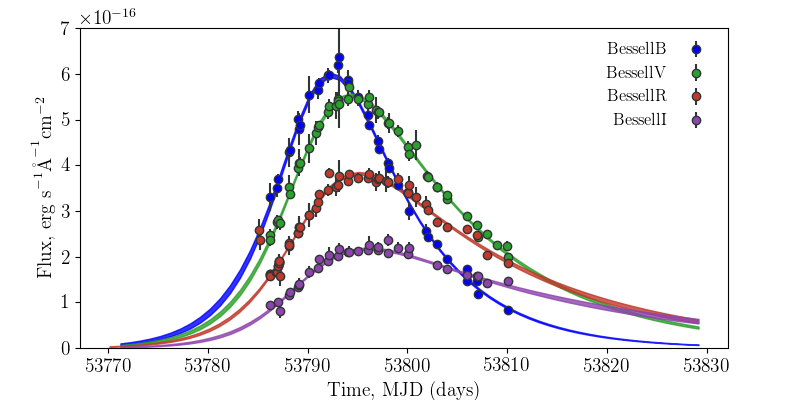

In [4]:
sn = pcc.classes.SNClass(snname)
sn.load_phot(verbose=False)
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))

sn.plot_lc(multiplot=False)

In [ ]:
pcc.coco.run_LCfit(os.path.join(pcc.defaults._default_data_dir_path, "lc/"+snname+".dat"), model="Karpenka12")

In [ ]:
sn = pcc.classes.SNClass(snname)
sn.load_phot(verbose=False)
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))

sn.plot_lc(multiplot=False)

## Model Choice
----
You can also pass a model to **`CoCo lcfit`**, this is possible through **`pycoco`** using the `model` arg. This will only take models that are defined in CoCo/src/models and match the filenames. So, currently the valid models are:

In [ ]:
models = np.unique([i.split(".")[0] for i in os.listdir(os.path.join(pcc.defaults._default_coco_dir_path, "src/models"))])
models

In [ ]:
model_name = "Karpenka12"
# model_name = "Karpenka12Afterglow"
# model_name = "Kessler10"
pcc.coco.run_LCfit(os.path.join(pcc.defaults._default_data_dir_path, "lc/"+snname+".dat"), model=model_name, verbose=True)

In [ ]:
sn = pcc.classes.SNClass(snname)
sn.load_phot(verbose=False)
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))

sn.plot_lc(multiplot=False)

## All SNe as Batch
___

In [ ]:
pcc.coco.run_LCfit_fileinput(os.path.join(pcc.defaults._default_coco_dir_path, "examples/lc.list"))
print("Done.")

## Call Specfit
---

### individual speclists

In [ ]:
pcc.coco.get_all_spec_lists()

In [6]:
sn.load_list(path=os.path.join(pcc.defaults._default_list_dir_path, sn.name+".list"))
sn.load_spec()

# sn.load_mangledspec()
sn.load_reconspec()
sn.load_simspec()


In [10]:
path_to_filter = os.path.join(pcc.defaults._default_filter_dir_path,"BessellB.dat")
BessellB = pcc.classes.FilterClass()
BessellB.read_filter_file(path_to_filter)
BessellB.calculate_AB_zp()

sim_spec_flux = []
sim_mjd_obs = []

for spec in sn.sim_spec:
    print(spec)
    flux = pcc.kcorr.calc_spectrum_filter_flux(filter_object=BessellB, spectrum_object=sn.sim_spec[spec], 
                                               correct_for_area=False)
    mjd_obs = float(spec.split("_")[-1])
    
    sim_spec_flux.append(flux)
    sim_mjd_obs.append(mjd_obs)

SN2006aj_53786.270000
Filter_area =  958.904702526
Integrated flux =  65.3955702281
SN2006aj_53787.230000
Filter_area =  583.185950131
Integrated flux =  41.0298233406
SN2006aj_53788.200000
Filter_area =  1358.72907164
Integrated flux =  131.886385781
SN2006aj_53789.170000
Filter_area =  1357.72217486
Integrated flux =  146.521717503
SN2006aj_53790.140000
Filter_area =  1361.80653493
Integrated flux =  164.34213622
SN2006aj_53791.100000
Filter_area =  1356.94789874
Integrated flux =  163.802182486
SN2006aj_53792.070000
Filter_area =  1358.08475139
Integrated flux =  170.17603978
SN2006aj_53793.040000
Filter_area =  1342.63870674
Integrated flux =  156.866851118
SN2006aj_53794.010000
Filter_area =  1358.55873129
Integrated flux =  160.605022385
SN2006aj_53794.970000
Filter_area =  494.406955809
Integrated flux =  64.3739416067
SN2006aj_53795.940000
Filter_area =  1315.20012487
Integrated flux =  137.109302356
SN2006aj_53796.910000
Filter_area =  1313.60589901
Integrated flux =  121.1075

<IPython.core.display.Javascript object>


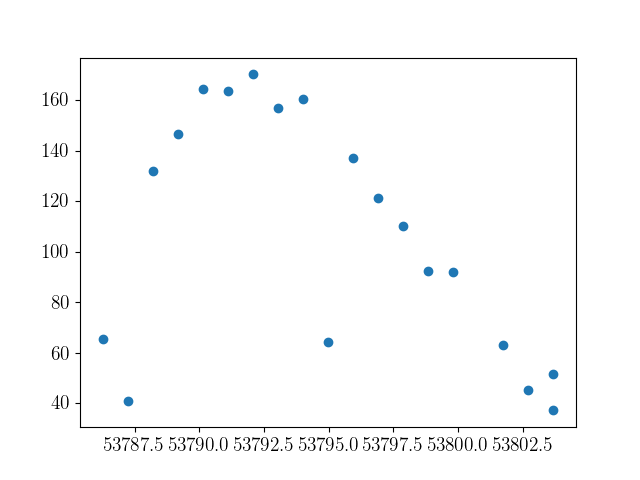

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(sim_mjd_obs, sim_spec_flux)


In [ ]:
# pcc.coco.run_specfit('/Users/berto/Code/CoCo/lists/SN2013ge.list')
pcc.coco.run_specfit(SNObject=sn)

## All Speclists
___

In [ ]:
pcc.coco.specfit_all()

# Specphase

In [ ]:
phase_path = os.path.join(pcc.defaults._default_coco_dir_path, "examples/phase.list")
pcc.coco.run_specphase("BessellV", phase_path)

In [ ]:
pcc.coco.run_specphase("BessellV", phase_path, model="Foo")

In [ ]:
pcc.coco.run_specphase("BessellV", phase_path, model="Bazin09")